In [15]:
import pandas as pd
from argparse import Namespace
import matplotlib.pyplot as plt

In [29]:
type('abc')

str

In [27]:
res =pd.read_csv('exp_results.csv')

In [28]:
res=res[65:]
res

,id,hypers,roc,acc
65,72,"Namespace(experiment_id='72', head_linear=982,...",0.732170,0.677885
66,73,"Namespace(experiment_id='73', head_linear=479,...",0.730355,0.670192
67,74,"Namespace(experiment_id='74', head_linear=575,...",0.726356,0.675000
68,75,"Namespace(experiment_id='75', head_linear=417,...",0.737240,0.676923
69,76,"Namespace(experiment_id='76', head_linear=571,...",0.715340,0.660577
70,77,"Namespace(experiment_id='77', head_linear=469,...",0.744610,0.684615
71,78,"Namespace(experiment_id='78', head_linear=479,...",0.749109,0.680769
72,79,"Namespace(experiment_id='79', head_linear=520,...",0.751082,0.678846
73,80,"Namespace(experiment_id='80', head_linear=498,...",0.738297,0.675000
74,81,"Namespace(experiment_id='81', head_linear=514,...",0.736297,0.691346


In [19]:
#vars(eval(res.iloc[62].hypers))

In [20]:
def get_hyper(row, name):
    hypers_namespace = eval(row.hypers)
    return vars(hypers_namespace)[name]

In [21]:
def plot(hyper, key='roc'):
    hyper2roc = [(get_hyper(row, hyper), row[key]) for _,row in res.iterrows()]
    plt.title(hyper)
    plt.scatter(*zip(*hyper2roc))
    plt.show()

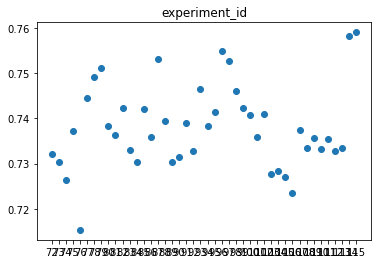

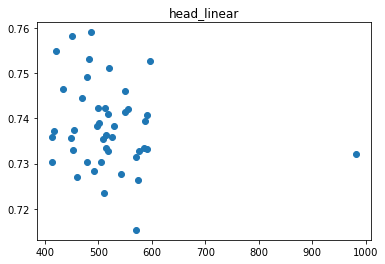

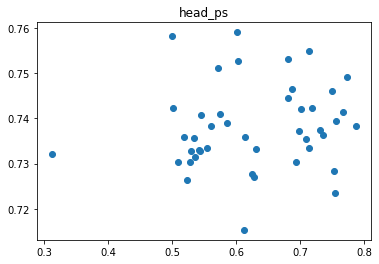

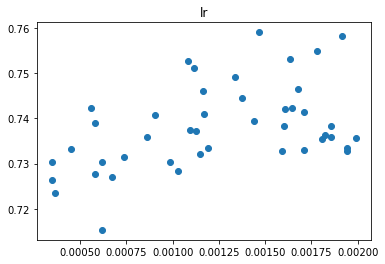

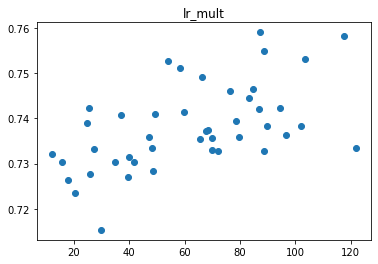

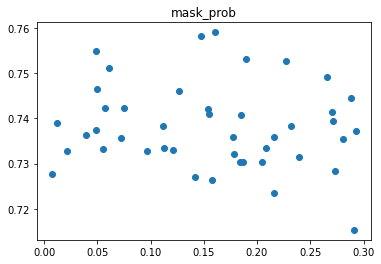

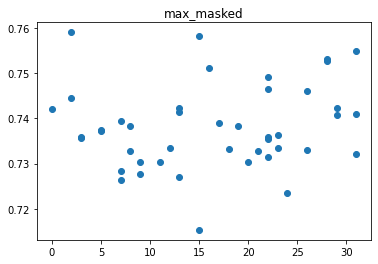

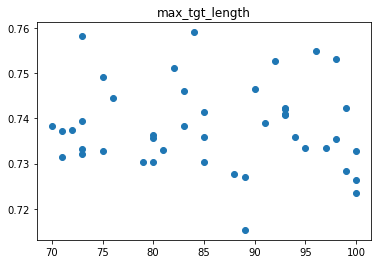

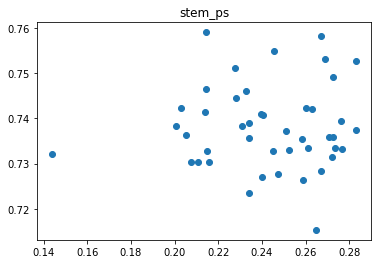

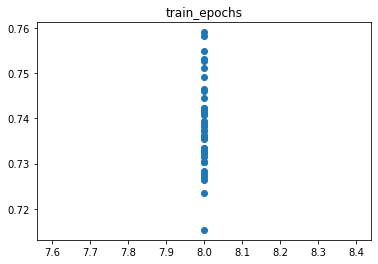

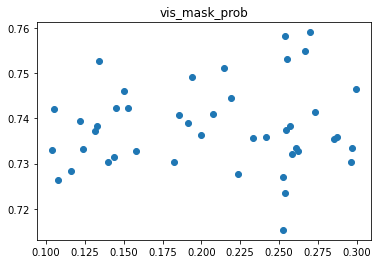

In [22]:
hypers = vars(eval(res.iloc[0].hypers)).keys()
for hyper in hypers:
    plot(hyper, 'roc')

In [23]:
lr_by_mult = [(get_hyper(row, 'lr')/get_hyper(row, 'lr_mult'), row['roc']) for _,row in res.iterrows()]

In [24]:
lr_by_mult=[(x, r) for (x,r) in lr_by_mult if r >.74]

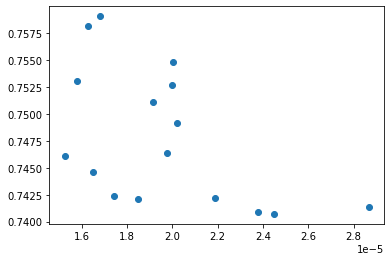

In [25]:
plt.scatter(*zip(*lr_by_mult))

In [12]:
lr_by_mult

[(4.311967448278565e-05, 0.7288386885023257),
 (3.2302944741785443e-05, 0.7401752737945683),
 (0.00016695115859095995, 0.7010329307996725),
 (3.122870725287694e-05, 0.7188093001497711),
 (1.1314052541961288e-05, 0.7324150887875324),
 (2.7403882155514044e-05, 0.7441176137714047),
 (6.965124228113801e-05, 0.7270995318235491),
 (6.30976934645507e-05, 0.7108963258900445),
 (1.2019367708944702e-05, 0.7379362510421736),
 (6.629115159944925e-05, 0.7218066103044091),
 (2.1488578438069038e-05, 0.7188941830679327),
 (0.00010373977395409105, 0.7251679738636064),
 (0.00019519655792899965, 0.7288443473635366),
 (2.0220218049357293e-05, 0.737549562192771),
 (7.106438962494957e-05, 0.7360065793693009),
 (8.86844043650858e-06, 0.7371534419080171),
 (2.330727039146438e-05, 0.7240022484541877),
 (1.126170689206679e-05, 0.7434196875554097),
 (7.367265222018488e-06, 0.7281973508984385),
 (4.97820307053062e-06, 0.7027173851534116),
 (1.8420732421865497e-05, 0.7350483455376107),
 (9.786911332726544e-06, 0.7